In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
path='/gpfs/commons/home/tlin/output/prs/new_anno_0318_24/bellenguez_adsp_reference/thres/plink_output/'
variant_025 = pd.read_csv(path+'variant_count_pip0.25.txt', sep = ' ', header = None, names = ['IID', 'COUNT','COUNT2'])
variant_01 = pd.read_csv(path + 'variant_count_pip0.1.txt', sep = ' ', header = None, names = ['IID', 'COUNT','COUNT2'])
variant_no_thres = pd.read_csv(path + 'variant_count_no_thres.txt', sep = ' ', header = None, names = ['IID', 'COUNT','COUNT2'])
pheno = pd.read_csv('/gpfs/commons/home/tlin/output/prs/new_anno_0318_24/bellenguez_adsp_reference/thres/prs_pip0.25.tsv', sep = '\t')

def process_df(df):
    df = df.merge(pheno[['IID','predicted_ancestry']], on='IID', how='left')
    df['COUNT2_by2'] = df.COUNT2/2
    filtered_df = df[df.predicted_ancestry.isin(['EUR', 'AMR', 'AFR'])]
    return filtered_df

variant_025 = process_df(variant_025)
variant_01 = process_df(variant_01)
variant_no_thres = process_df(variant_no_thres)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(19624, 4)

In [55]:
def draw_hist(df,plt,title):
    n_bins = 100
    plt.hist(df[df.predicted_ancestry == 'EUR'].COUNT2, n_bins, alpha=0.6, label='EUR', color = 'red',histtype='step', linewidth=2)
    plt.hist(df[df.predicted_ancestry == 'AFR'].COUNT2, n_bins, alpha=0.6, label='AFR', color='blue',histtype='step',linewidth=2)
    plt.hist(df[df.predicted_ancestry == 'AMR'].COUNT2, n_bins, alpha=0.6, label='AMR', color = 'green',histtype='step',linewidth=2)
    plt.set_xlabel('SNP Count per individual')
    plt.legend(loc='upper left')
    plt.set_title(title)

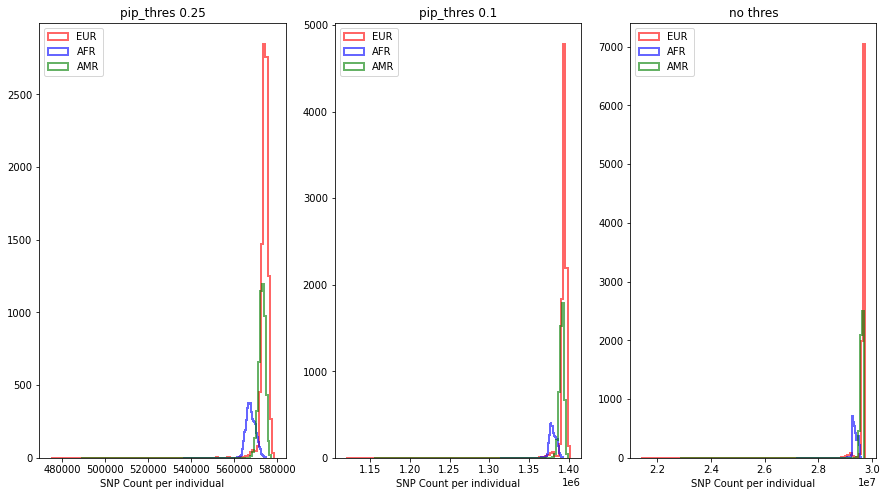

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))  # Create a figure and subplots
draw_hist(variant_no_thres,axes[2],'no thres')
draw_hist(variant_01,  axes[1],'pip_thres 0.1')
draw_hist(variant_025, axes[0],'pip_thres 0.25')


In [123]:
variant_no_thres.COUNT.mean()

33072961.76090424

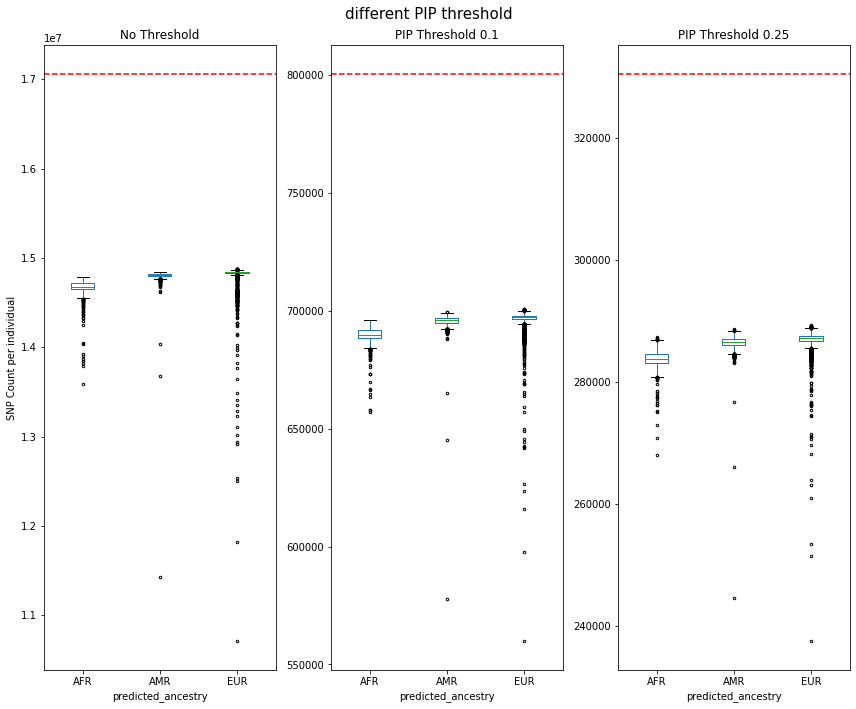

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(12, 10))  # Create a figure and subplots

# Plot for no thres
variant_no_thres.boxplot(column='COUNT2_by2', by='predicted_ancestry', ax=axes[0], grid=False,flierprops=dict(marker='.', markersize=5))
axes[0].axhline(y=17063269, color='red', linestyle='--')
axes[0].set_title('No Threshold')
axes[0].set_ylabel('SNP Count per individual')



# Plot for pip thres 0.1
variant_01.boxplot(column='COUNT2_by2', by='predicted_ancestry', ax=axes[1], grid=False,flierprops=dict(marker='.', markersize=5))
axes[1].axhline(y=800633, color='red', linestyle='--')
axes[1].set_title('PIP Threshold 0.1')

# Plot for pip thres 0.25
variant_025.boxplot(column='COUNT2_by2', by='predicted_ancestry', ax=axes[2], grid=False,flierprops=dict(marker='.', markersize=5))
axes[2].axhline(y=330594, color='red', linestyle='--')
axes[2].set_title('PIP Threshold 0.25')

plt.suptitle('different PIP threshold', fontsize=15)
plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()


In [15]:
variant_no_thres

,IID,COUNT,COUNT2,predicted_ancestry
1,A-MHAS-MH000450-BL-COL-100868,33105386,NaN,AMR
7,G-KGAD-KA000983-UNK-WU-8038741718,33105902,NaN,EUR
11,A-MIA-UM010915-BL-MIA-201615903,33097528,NaN,AMR
12,A-AMSH-AM000167-BL-MIA-201106525d,33092190,NaN,EUR
13,A-ADC-AD011955-BL-NCR-13AD64292,33093806,NaN,EUR
...,...,...,...,...
36351,G-KGAD-KA001123-UNK-WU-8038741222,33098510,NaN,AFR
36353,A-CUHS-CU010969-BL-COL-56120BL1,33095348,NaN,AFR
36354,A-MHAS-MH000795-BL-COL-101213,33106482,NaN,AMR
36359,A-MIA-UM009945-BL-NCR-201002493,33098512,NaN,AFR


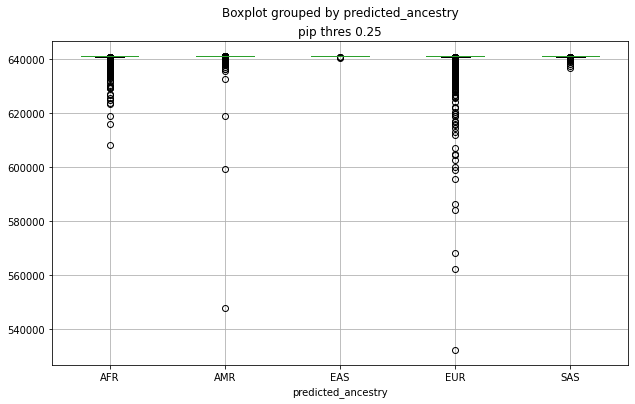

In [6]:
variant_025.boxplot(column='COUNT', by='predicted_ancestry', figsize=(10, 6))
plt.title('pip thres 0.25')
plt.show()

In [10]:
variant_025[variant_025.IID=='A-ACT-AC000014-BL-NCR-15AD78694']


,IID,COUNT,predicted_ancestry
13675,A-ACT-AC000014-BL-NCR-15AD78694,641120,EUR


In [11]:
variant_01[variant_01.IID=='A-ACT-AC000014-BL-NCR-15AD78694']

,IID,COUNT,predicted_ancestry
13675,A-ACT-AC000014-BL-NCR-15AD78694,1554506,EUR


In [12]:
variant_no_thres[variant_no_thres.IID=='A-ACT-AC000014-BL-NCR-15AD78694']

,IID,COUNT,predicted_ancestry
31427,A-ACT-AC000014-BL-NCR-15AD78694,33128148,EUR
